In [134]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, model_selection, linear_model, ensemble, pipeline
sns.set(rc={'figure.figsize':(10,10)})

### Data

In [147]:
train = pd.read_csv('train.csv')
test =  pd.read_csv('test.csv')
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [26]:
train.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

           ...         WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count      ...        1460.000000  1460.000000    1460.000000  1460.000000   
mean       ...          94.244521    46.660274      21.954110     3.409589   
std        ...         125.338794    66.256028      61.119149    29.317331   
min        ...           0.000000     0.000000       0.000000     0.000000   
25%        ...           0.000000     0.000000       0.000000     0.000000   
50%        ...           0.000000    25.000000       0.000000     0.000000   
75%        ...         168.000000    68.000000       0.000000     0.000000   
max        ...         857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal       MoSold       YrSold  \
count  1460.000000  1460.000000   1460.000000  1460.000000  1460.000000   
mean     15.060959     2.758904     43.489041     6.321918  2007.815753   
std      55.757415    40.177307    496.123024     2.703626     1.328095   
min       0.000000     0.000000      0.000000     1.000000  2006.000000   
25%       0.000000     0.000000      0.000000     5.000000  2007.000000   
50%       0.000000     0.000000      0.000000     6.000000  2008.000000   
75%       0.000000     0.000000      0.000000     8.000000  2009.000000   
max     480.000000   738.000000  15500.000000    12.000000  2010.000000   

           SalePrice  
count    1460.000000  
mean   180921.195890  
std     79442.502883  
min     34900.000000  
25%    129975.000000  
50%    163000.000000  
75%    214000.000000  
max    755000.000000  

[8 rows x 38 columns]

### Initial EDA

#### Response: Saleprice

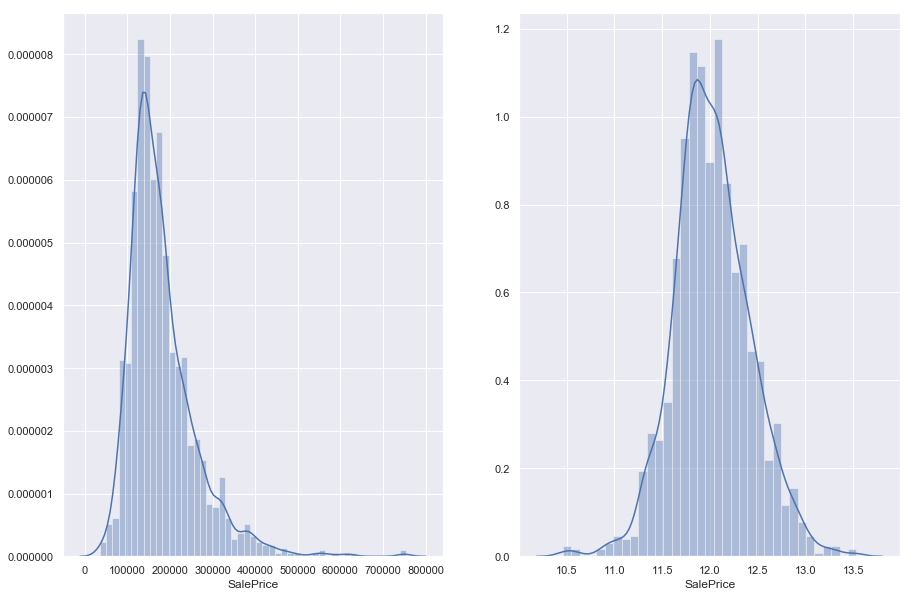

In [27]:
_, (ax1, ax2) = plt.subplots(figsize=(15,10), ncols=2)
sns.distplot(train['SalePrice'], ax=ax1)
sns.distplot(np.log(train['SalePrice']), ax=ax2)

#### Predictors: Categorical, Numerical and Ordinal

In [28]:
cat = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 
      'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
      'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
      'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'GarageType',
      'MoSold', 'SaleType', 'SaleCondition', 'MiscFeature']

num = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 
      'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'YrSold', 'MiscVal']
ordinal = ['LotShape', 'Utilities', 'LandSlope', 'OverallQual','OverallCond',
          'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
           'BsmtFinType2', 'HeatingQC', 'Electrical', 'KitchenQual', 
           'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
           'PavedDrive', 'PoolQC', 'Fence']

##### Categoricals

In [29]:
train[cat].head()

MSSubClass MSZoning Street Alley LandContour LotConfig Neighborhood  \
0          60       RL   Pave   NaN         Lvl    Inside      CollgCr   
1          20       RL   Pave   NaN         Lvl       FR2      Veenker   
2          60       RL   Pave   NaN         Lvl    Inside      CollgCr   
3          70       RL   Pave   NaN         Lvl    Corner      Crawfor   
4          60       RL   Pave   NaN         Lvl       FR2      NoRidge   

  Condition1 Condition2 BldgType     ...     Exterior2nd MasVnrType  \
0       Norm       Norm     1Fam     ...         VinylSd    BrkFace   
1      Feedr       Norm     1Fam     ...         MetalSd       None   
2       Norm       Norm     1Fam     ...         VinylSd    BrkFace   
3       Norm       Norm     1Fam     ...         Wd Shng       None   
4       Norm       Norm     1Fam     ...         VinylSd    BrkFace   

  Foundation Heating CentralAir GarageType MoSold SaleType SaleCondition  \
0      PConc    GasA          Y     Attchd      2       WD        Normal   
1     CBlock    GasA          Y     Attchd      5       WD        Normal   
2      PConc    GasA          Y     Attchd      9       WD        Normal   
3     BrkTil    GasA          Y     Detchd      2       WD       Abnorml   
4      PConc    GasA          Y     Attchd     12       WD        Normal   

  MiscFeature  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN  

[5 rows x 24 columns]

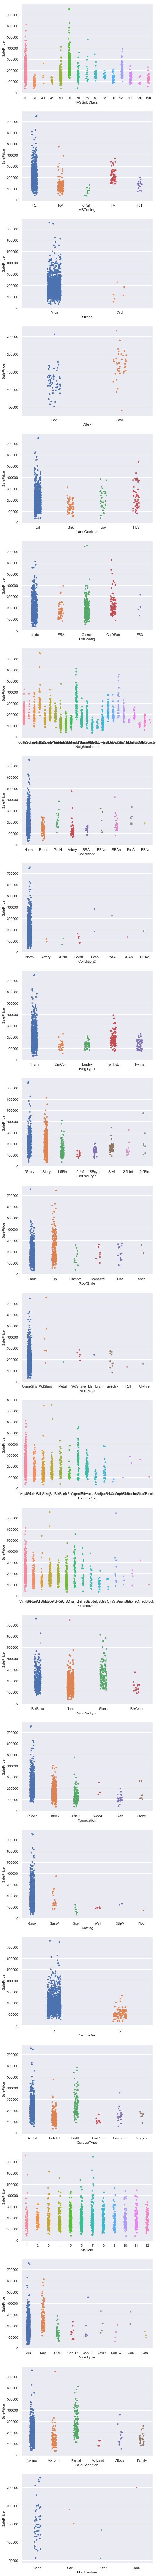

In [30]:
_, axes = plt.subplots(nrows=len(cat), figsize=(7.5, 150))
for idx, c in enumerate(cat):
    ax = sns.stripplot(x=c, y='SalePrice', data=train, ax=axes[idx])

In [31]:
train[cat].isna().sum()

MSSubClass          0
MSZoning            0
Street              0
Alley            1369
LandContour         0
LotConfig           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
Foundation          0
Heating             0
CentralAir          0
GarageType         81
MoSold              0
SaleType            0
SaleCondition       0
MiscFeature      1406
dtype: int64

##### Ordinals

In [32]:
train[ordinal].head()

LotShape Utilities LandSlope  OverallQual  OverallCond ExterQual ExterCond  \
0      Reg    AllPub       Gtl            7            5        Gd        TA   
1      Reg    AllPub       Gtl            6            8        TA        TA   
2      IR1    AllPub       Gtl            7            5        Gd        TA   
3      IR1    AllPub       Gtl            7            5        TA        TA   
4      IR1    AllPub       Gtl            8            5        Gd        TA   

  BsmtQual BsmtCond BsmtExposure  ...  Electrical KitchenQual Functional  \
0       Gd       TA           No  ...       SBrkr          Gd        Typ   
1       Gd       TA           Gd  ...       SBrkr          TA        Typ   
2       Gd       TA           Mn  ...       SBrkr          Gd        Typ   
3       TA       Gd           No  ...       SBrkr          Gd        Typ   
4       Gd       TA           Av  ...       SBrkr          Gd        Typ   

  FireplaceQu GarageFinish GarageQual GarageCond PavedDrive PoolQC Fence  
0         NaN          RFn         TA         TA          Y    NaN   NaN  
1          TA          RFn         TA         TA          Y    NaN   NaN  
2          TA          RFn         TA         TA          Y    NaN   NaN  
3          Gd          Unf         TA         TA          Y    NaN   NaN  
4          TA          RFn         TA         TA          Y    NaN   NaN  

[5 rows x 23 columns]

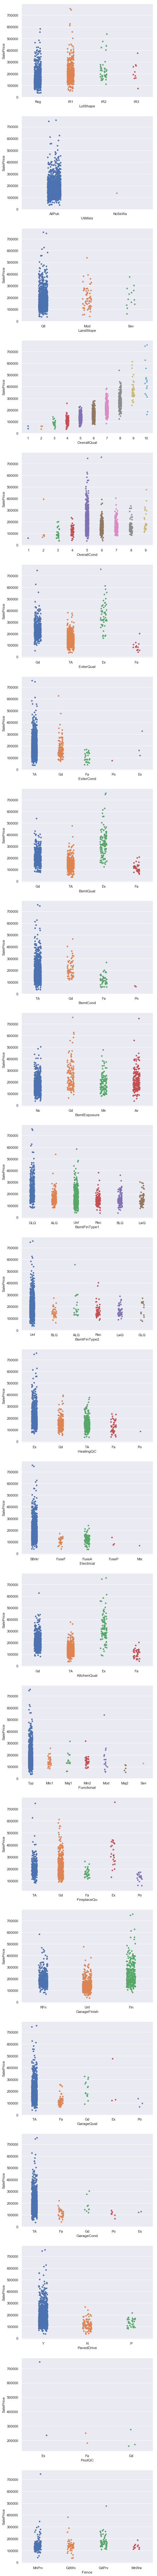

In [33]:
_, axes = plt.subplots(nrows=len(ordinal), figsize=(7.5, 150))
for idx, c in enumerate(ordinal):
    ax = sns.stripplot(x=c, y='SalePrice', data=train, ax=axes[idx])

In [34]:
train[ordinal].isna().sum()

LotShape           0
Utilities          0
LandSlope          0
OverallQual        0
OverallCond        0
ExterQual          0
ExterCond          0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
HeatingQC          0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
PoolQC          1453
Fence           1179
dtype: int64

##### Numericals

In [35]:
train[num].head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF   ...     GarageCars  \
0           0        150          856       856   ...              2   
1           0        284         1262      1262   ...              2   
2           0        434          920       920   ...              2   
3           0        540          756       961   ...              3   
4           0        490         1145      1145   ...              3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  YrSold  MiscVal  
0         0    2008        0  
1         0    2007        0  
2         0    2008        0  
3         0    2006        0  
4         0    2008        0  

[5 rows x 30 columns]

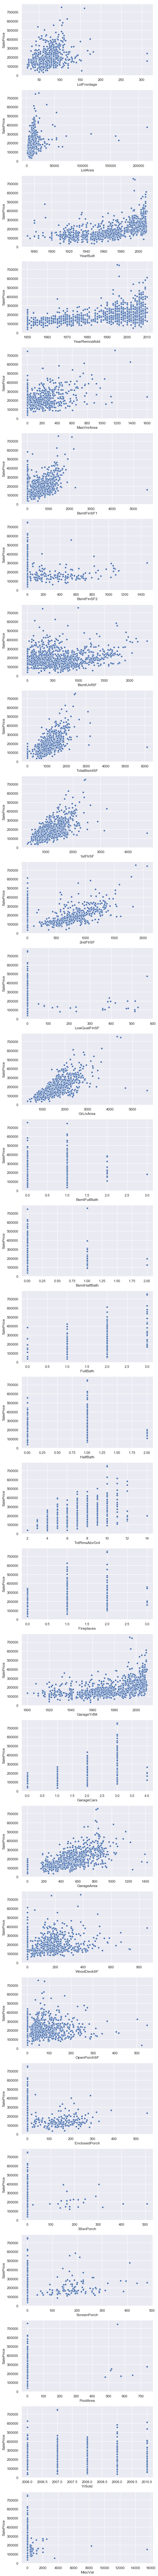

In [36]:
_, axes = plt.subplots(nrows=len(num), figsize=(7.5, 150))
for idx, c in enumerate(num):
    ax = sns.scatterplot(x=c, y='SalePrice', data=train, ax=axes[idx])

In [37]:
train[num].isna().sum()

LotFrontage      259
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
YrSold             0
MiscVal            0
dtype: int64

In [38]:
(train[num] == 0).sum()

LotFrontage         0
LotArea             0
YearBuilt           0
YearRemodAdd        0
MasVnrArea        861
BsmtFinSF1        467
BsmtFinSF2       1293
BsmtUnfSF         118
TotalBsmtSF        37
1stFlrSF            0
2ndFlrSF          829
LowQualFinSF     1434
GrLivArea           0
BsmtFullBath      856
BsmtHalfBath     1378
FullBath            9
HalfBath          913
TotRmsAbvGrd        0
Fireplaces        690
GarageYrBlt         0
GarageCars         81
GarageArea         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
YrSold              0
MiscVal          1408
dtype: int64

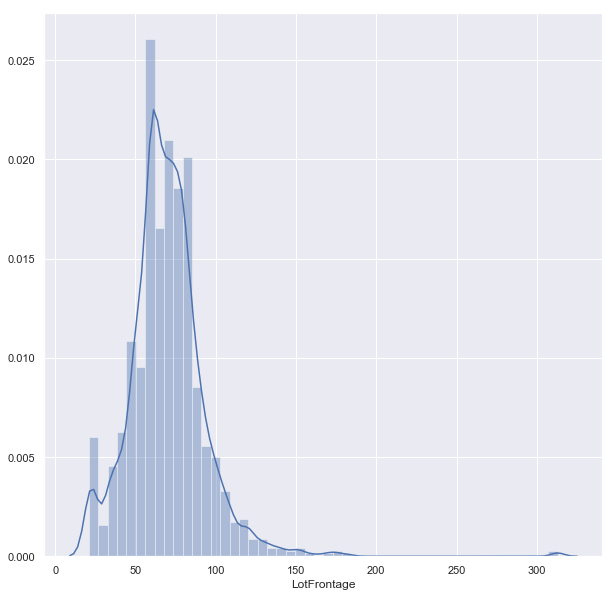

In [39]:
sns.distplot(train['LotFrontage'].dropna())

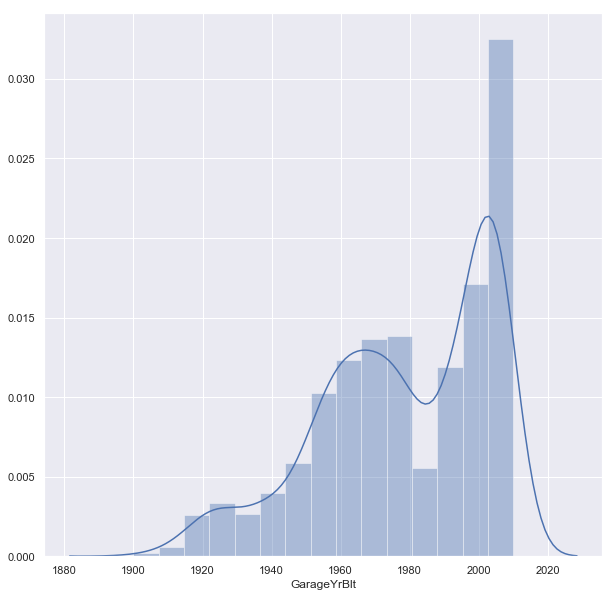

In [69]:
sns.distplot(train['GarageYrBlt'].dropna())

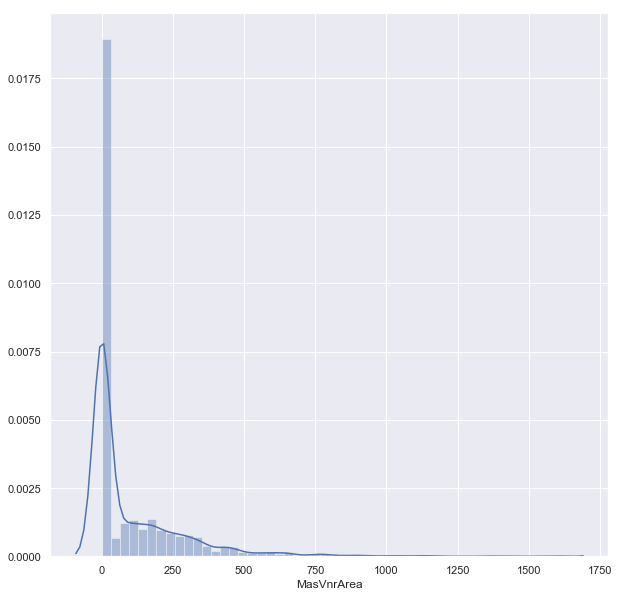

In [70]:
sns.distplot(train['MasVnrArea'].dropna())

### Preprocessing I

- Impute missing data
- Sensible values for ordinal predictors

#### Imputation

In [71]:
def impute_missing(X):
    df = X.copy()
    # categoricals
    df['Alley'] = df['Alley'].fillna('missing')
    df['GarageType'] = df['GarageType'].fillna('missing')
    df['MiscFeature'] = df['MiscFeature'].fillna('missing')
    # ordinals
    df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
    df['Electrical'] =  df['Electrical'].mode()[0]
    # .. garage/pool/fence NAs, correspond to no garage/pool/fence according to data_description.txt
    df['GarageFinish'] = df['GarageFinish'].fillna('NA')
    df['GarageCond'] = df['GarageCond'].fillna('NA')
    df['GarageQual'] = df['GarageQual'].fillna('NA')
    df['PoolQC'] = df['PoolQC'].fillna('NA')
    df['Fence'] = df['Fence'].fillna('NA')
    # .. assuming same for basements
    df['BsmtQual'] = df['BsmtQual'].fillna('NA')
    df['BsmtCond'] = df['BsmtCond'].fillna('NA')
    df['BsmtExposure'] = df['BsmtExposure'].fillna('NA')
    df['BsmtFinType1'] = df['BsmtFinType1'].fillna('NA')
    df['BsmtFinType2'] = df['BsmtFinType2'].fillna('NA')
    # numericals
    df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())
    df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median()) # is there a better way.. feature engineer year bins and never?
    df['MasVnrArea'] =  df['MasVnrArea'].fillna(df['MasVnrArea'].median())
    return df    

In [72]:
impute_missing(train).head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street    Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  missing      Reg   
1   2          20       RL         80.0     9600   Pave  missing      Reg   
2   3          60       RL         68.0    11250   Pave  missing      IR1   
3   4          70       RL         60.0     9550   Pave  missing      IR1   
4   5          60       RL         84.0    14260   Pave  missing      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0     NA    NA     missing       0   
1         Lvl    AllPub    ...            0     NA    NA     missing       0   
2         Lvl    AllPub    ...            0     NA    NA     missing       0   
3         Lvl    AllPub    ...            0     NA    NA     missing       0   
4         Lvl    AllPub    ...            0     NA    NA     missing       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

#### Ordinals

In [43]:
def qual_ordinal_score(x):
    '''BsmtQual, GarageQual, PoolQC, FireplaceQu, BsmtCond, GarageCond'''
    if x == 'Ex':
        return 5
    elif x == 'Gd':
        return 4
    elif x == 'TA':
        return 3
    elif x =='Fa':
        return 2
    elif x =='Po':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))

def bsmt_exposure_ordinal_score(x):
    '''BsmtExposure'''
    if x == 'Gd':
        return 4
    elif x == 'Av':
        return 3
    elif x =='Mn':
        return 2
    elif x =='No':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))

def bsmt_fin_type_ordinal_score(x):
    '''BsmtExposure'''
    if x == 'GLQ':
        return 6
    elif x == 'ALQ':
        return 5
    elif x =='BLQ':
        return 4
    elif x =='Rec':
        return 3
    elif x == 'LwQ':
        return 2
    elif x == 'Unf':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
        
def garage_finish_ordinal_score(x):
    '''GarageFinish'''
    if x == 'Fin':
        return 3
    elif x == 'RFn':
        return 2
    elif x =='Unf':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
        
def fence_ordinal_score(x):
    '''Fence'''
    if x == 'GdPrv':
        return 4
    elif x == 'MnPrv':
        return 3
    elif x =='GdWo':
        return 2
    elif x == 'MnWw':
        return 1
    elif x == 'NA':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
    
def lot_shape_ordinal_score(x):
    '''LotShape'''
    if x == 'Reg':
        return 0
    elif x == 'IR1':
        return 1
    elif x =='IR2':
        return 2
    elif x == 'IR3':
        return 3
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
        
def utilites_ordinal(x):
    '''Utilities'''
    if x == 'AllPub':
        return 3
    elif x == 'NoSewr':
        return 2
    elif x =='NoSeWa':
        return 1
    elif x == 'ELO':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
    
def land_slope_ordinal(x):
    '''LandSlope'''
    if x == 'Gtl':
        return 0
    elif x == 'Mod':
        return 1
    elif x =='Sev':
        return 2
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))
        
def electrical_ordinal(x):
    '''Electrical'''
    if x == 'SBrkr':
        return 4
    elif x == 'FuseA':
        return 3
    elif x =='FuseF':
        return 2
    elif x == 'FuseP':
        return 1
    elif x == 'Mix':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))

def functional_ordinal(x):
    '''Functional'''
    if x == 'Typ':
        return 7
    elif x == 'Min1':
        return 6
    elif x =='Min2':
        return 5
    elif x =='Mod':
        return 4
    elif x == 'Maj1':
        return 3
    elif x == 'Maj2':
        return 2
    elif x == 'Sev':
        return 1
    elif x == 'Sal':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))    

def paved_ordinal(x):
    '''PavedDrive'''
    if x == 'Y':
        return 2
    elif x == 'P':
        return 1
    elif x == 'N':
        return 0
    else:
        raise ValueError('UNEXPECTED VALUE: {}'.format(x))    
        
ordinal_extractor_map = {'LotShape' : lot_shape_ordinal_score,
                         'Utilities' : utilites_ordinal,
                         'LandSlope' : land_slope_ordinal,
                         'BsmtQual' : qual_ordinal_score,
                         'BsmtCond' : qual_ordinal_score,
                         'BsmtExposure' : bsmt_exposure_ordinal_score,
                         'BsmtFinType1' : bsmt_fin_type_ordinal_score,
                         'BsmtFinType2' : bsmt_fin_type_ordinal_score,
                         'HeatingQC' : qual_ordinal_score,
                         'Electrical' : electrical_ordinal,
                         'KitchenQual' : qual_ordinal_score,
                         'Functional' : functional_ordinal,
                         'FireplaceQu' : qual_ordinal_score,
                         'GarageFinish' :  garage_finish_ordinal_score,
                         'GarageQual' : qual_ordinal_score,
                         'GarageCond' : qual_ordinal_score,
                         'PavedDrive' : paved_ordinal,
                         'PoolQC' : qual_ordinal_score,
                         'Fence' : fence_ordinal_score}

def extract_ordinals(X):
    return pd.DataFrame([X[k].apply(f) for k, f in ordinal_extractor_map.items()]).T

In [44]:
extract_ordinals(impute_missing(train)).head()

LotShape  Utilities  LandSlope  BsmtQual  BsmtCond  BsmtExposure  \
0         0          3          0         4         3             1   
1         0          3          0         4         3             4   
2         1          3          0         4         3             2   
3         1          3          0         3         4             1   
4         1          3          0         4         3             3   

   BsmtFinType1  BsmtFinType2  HeatingQC  Electrical  KitchenQual  Functional  \
0             6             1          5           4            4           7   
1             5             1          5           4            3           7   
2             6             1          5           4            4           7   
3             5             1          4           4            4           7   
4             6             1          5           4            4           7   

   FireplaceQu  GarageFinish  GarageQual  GarageCond  PavedDrive  PoolQC  \
0            4             2           3           3           2       0   
1            3             2           3           3           2       0   
2            3             2           3           3           2       0   
3            4             1           3           3           2       0   
4            3             2           3           3           2       0   

   Fence  
0      0  
1      0  
2      0  
3      0  
4      0

### More EDA

In [149]:
numericals_df = impute_missing(train)[num]
numericals_df.head()

LotFrontage  LotArea  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
0         65.0     8450       2003          2003       196.0         706   
1         80.0     9600       1976          1976         0.0         978   
2         68.0    11250       2001          2002       162.0         486   
3         60.0     9550       1915          1970         0.0         216   
4         84.0    14260       2000          2000       350.0         655   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF   ...     GarageCars  \
0           0        150          856       856   ...              2   
1           0        284         1262      1262   ...              2   
2           0        434          920       920   ...              2   
3           0        540          756       961   ...              3   
4           0        490         1145      1145   ...              3   

   GarageArea  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0         548           0           61              0          0            0   
1         460         298            0              0          0            0   
2         608           0           42              0          0            0   
3         642           0           35            272          0            0   
4         836         192           84              0          0            0   

   PoolArea  YrSold  MiscVal  
0         0    2008        0  
1         0    2007        0  
2         0    2008        0  
3         0    2006        0  
4         0    2008        0  

[5 rows x 30 columns]

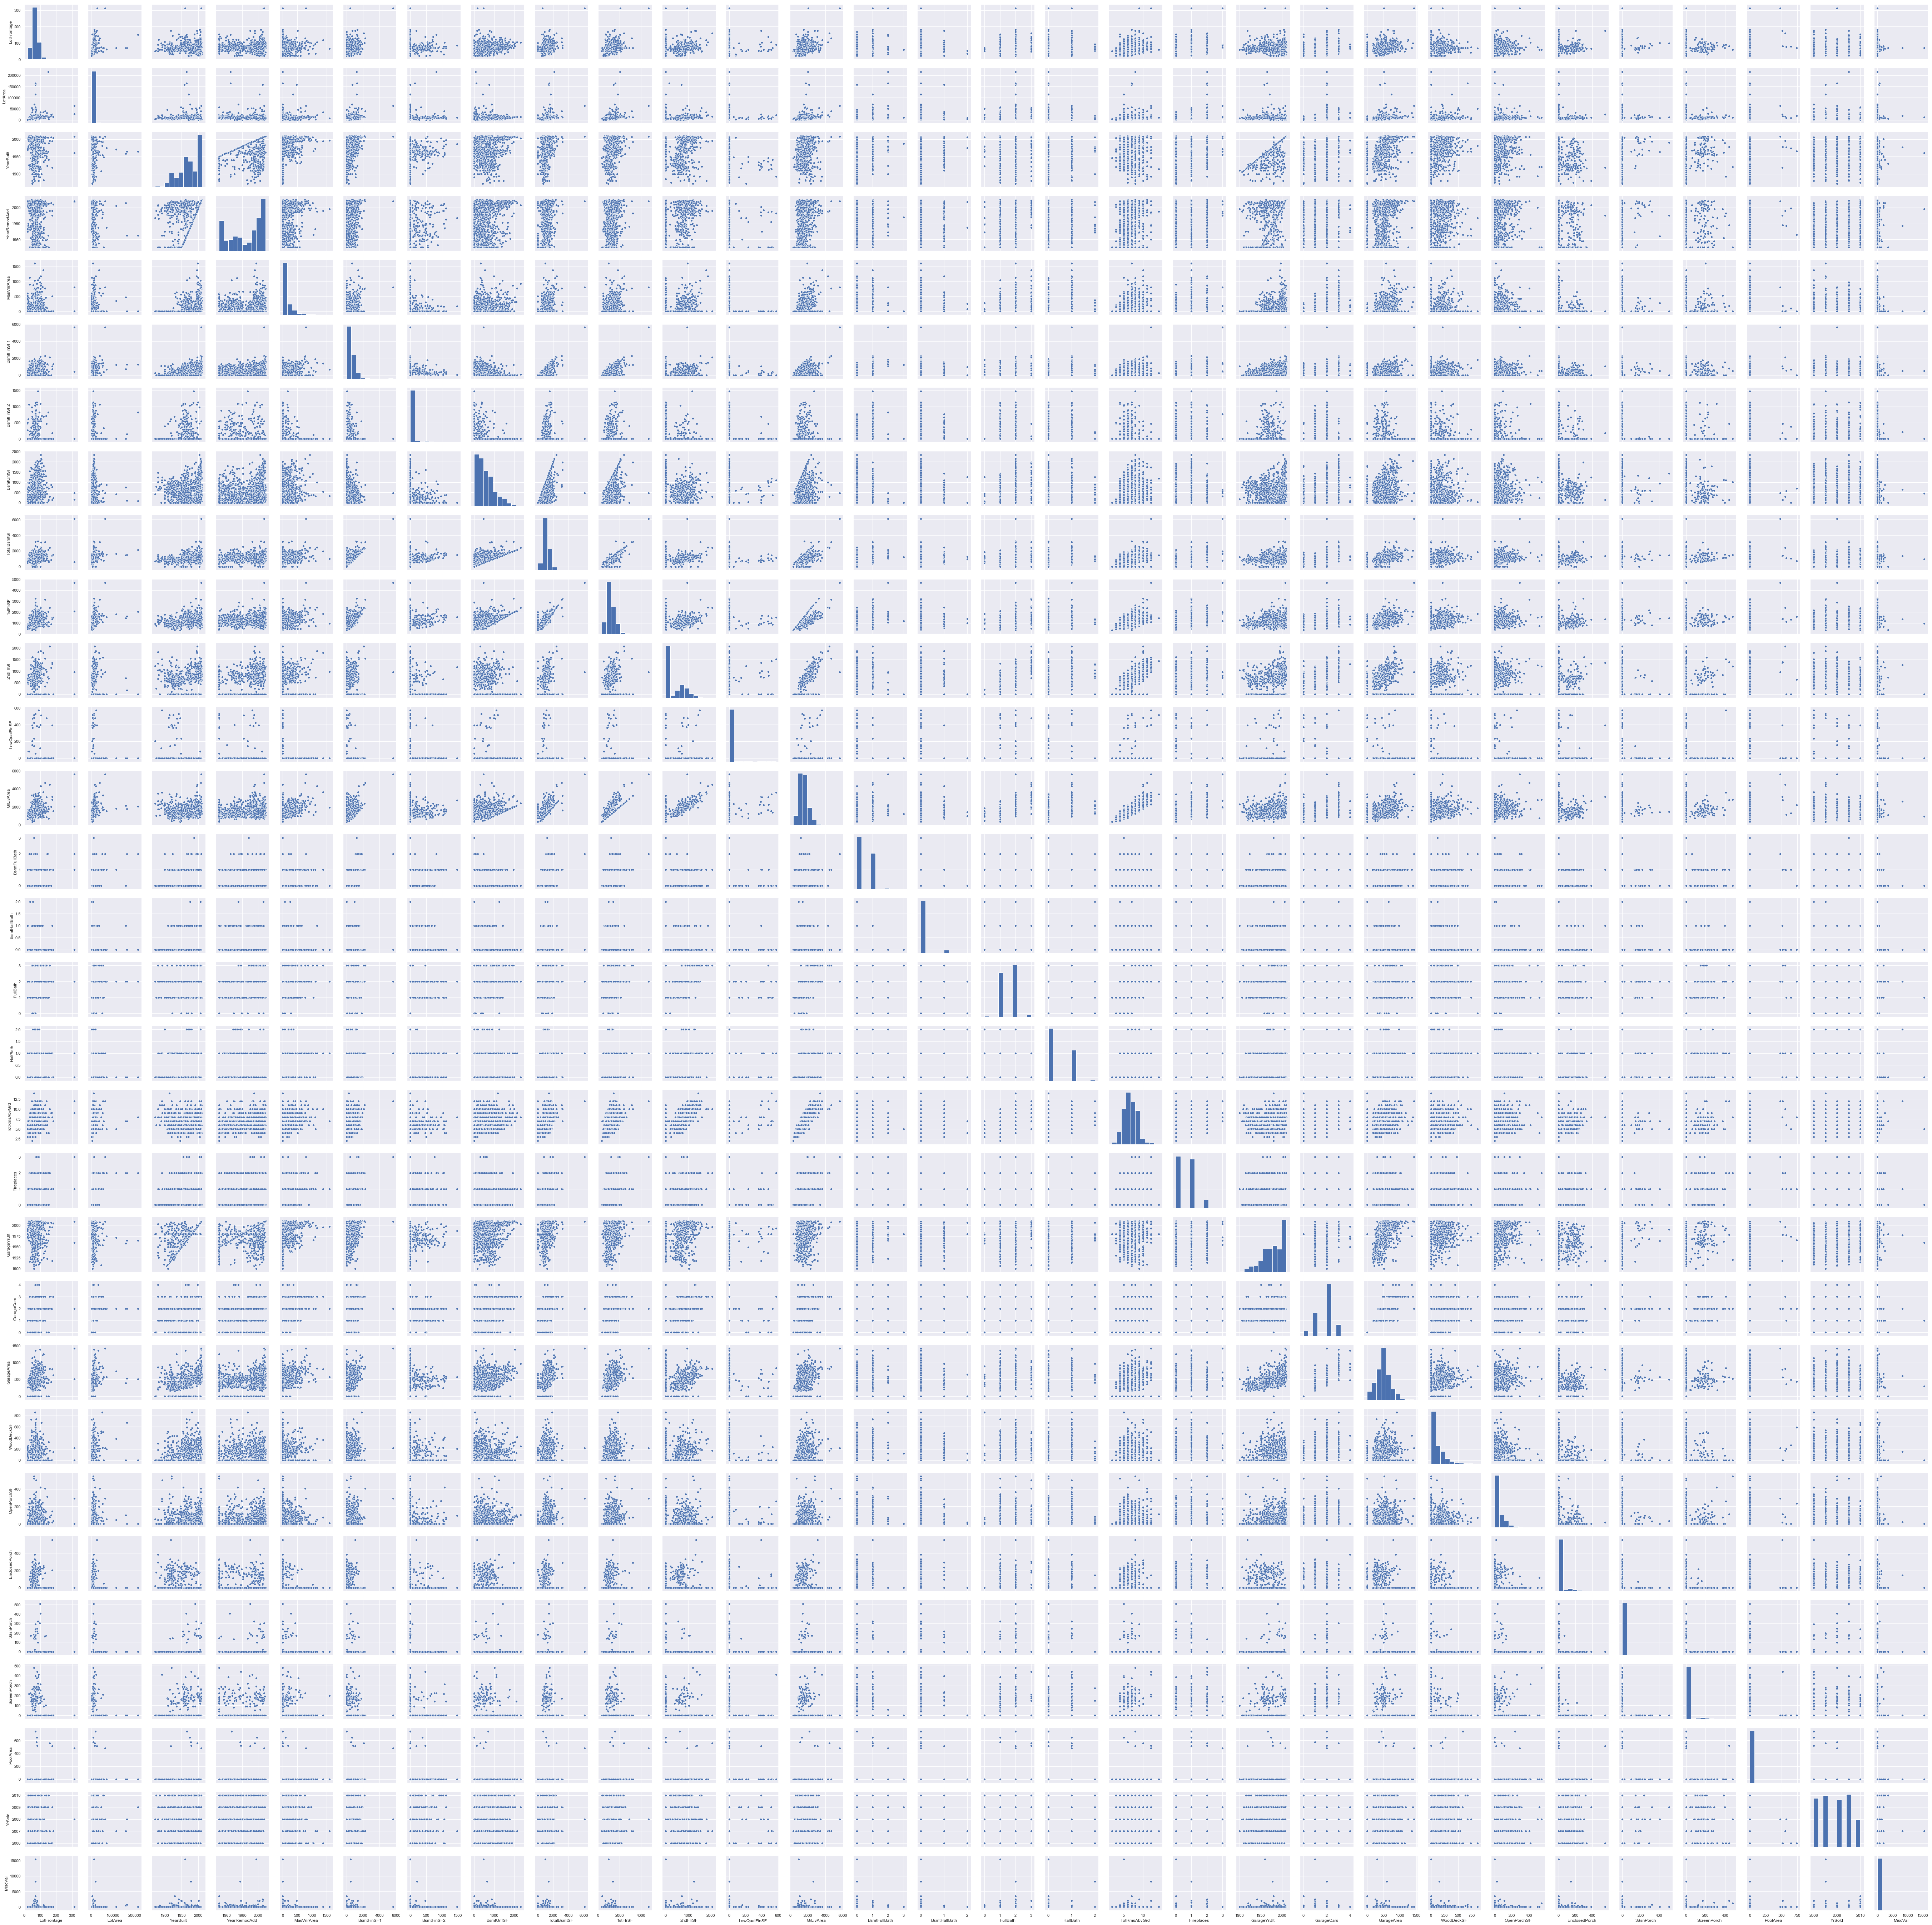

In [150]:
sns.pairplot(numericals_df)

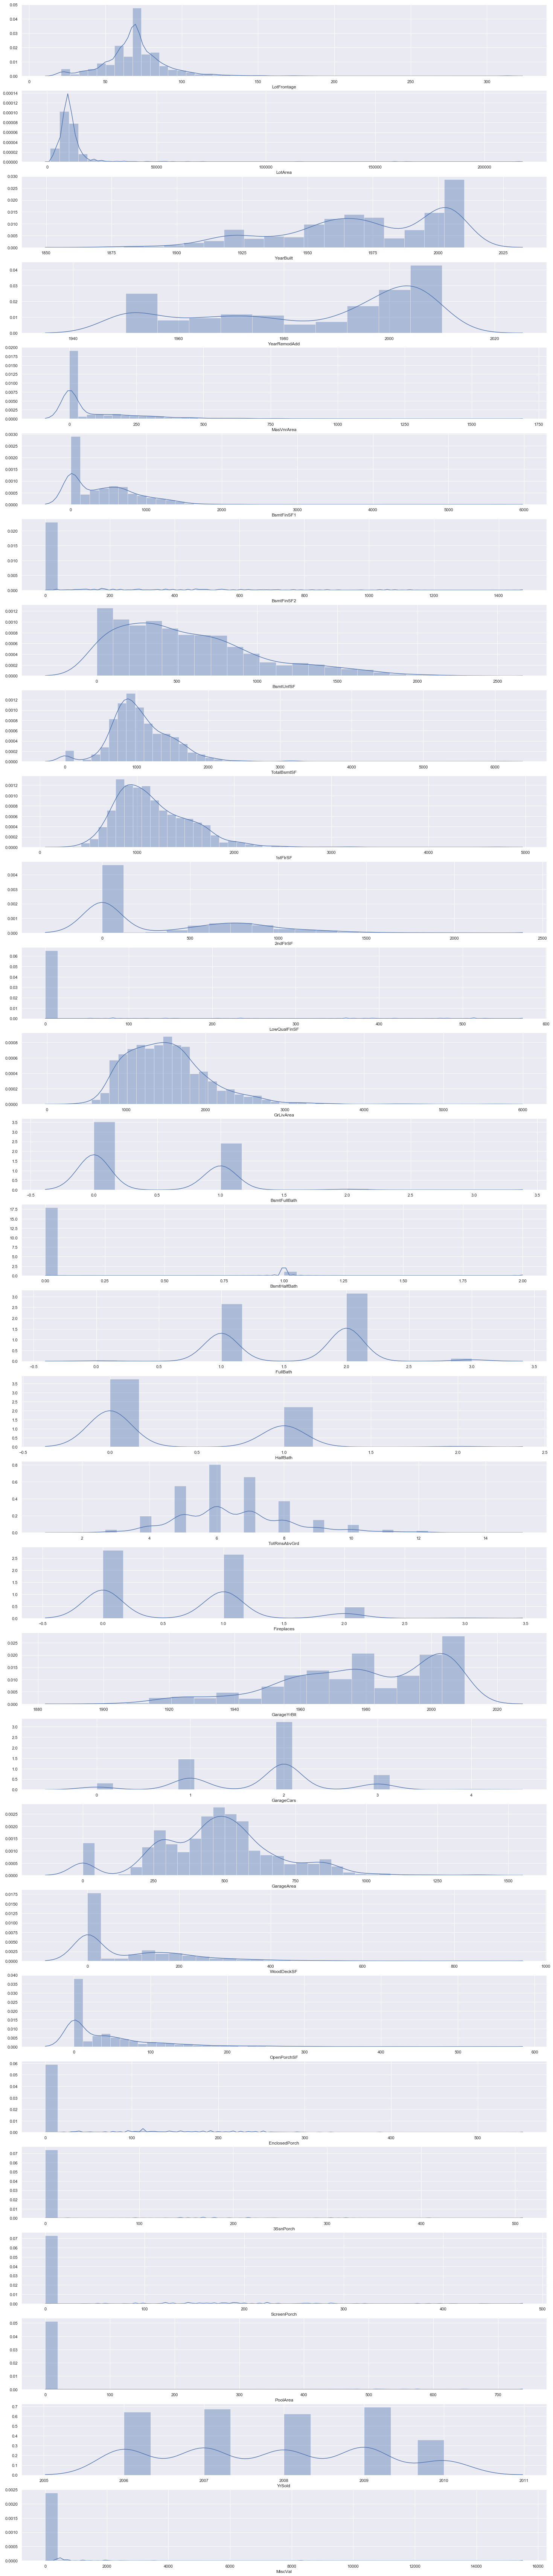

In [155]:
_, axes = plt.subplots(nrows=len(num), figsize=(25,125))
for idx, n in enumerate(numericals_df.columns):
    sns.distplot(numericals_df[n], ax=axes[idx])

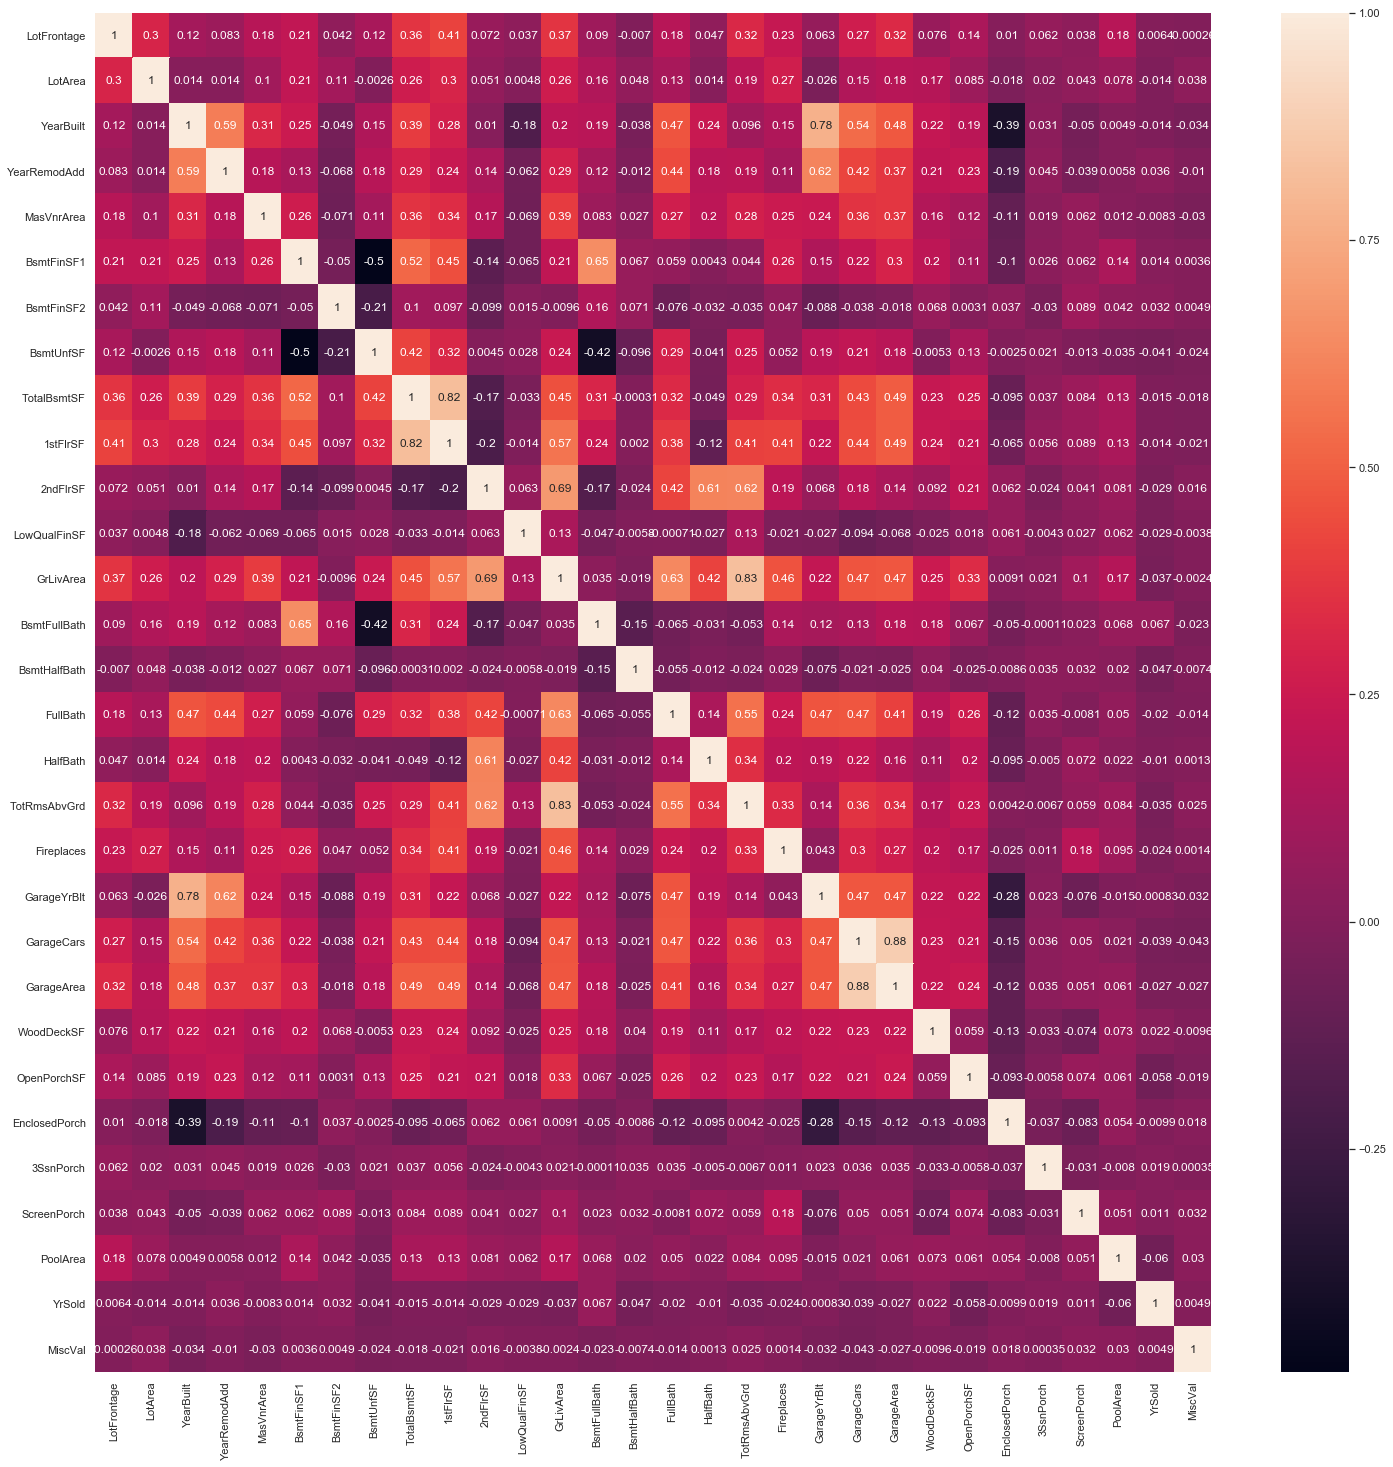

In [82]:
_, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(numericals_df.corr(), annot=True, ax=ax)

### Preprocessing II

- ?remove outliers
- ?add features
- ?remove features

### Prepare for training

- One-hot encoding for categoricals
- log transform `SalePrice`


In [46]:
def extract_categorical(series):
    df = pd.get_dummies(series)
    df.columns = ['{}_{}'.format(series.name, c) for c in df.columns]
    return df

def extract_categoricals(X, categoricals):
    ret = pd.DataFrame()
    for cat in categoricals:
        df = extract_categorical(X[cat])
        ret = pd.concat([ret, df], axis=1)
    return ret
        
extract_categoricals(impute_missing(train), cat).head()

MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  MSSubClass_50  \
0              0              0              0              0              0   
1              1              0              0              0              0   
2              0              0              0              0              0   
3              0              0              0              0              0   
4              0              0              0              0              0   

   MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  MSSubClass_85  \
0              1              0              0              0              0   
1              0              0              0              0              0   
2              1              0              0              0              0   
3              0              1              0              0              0   
4              1              0              0              0              0   

          ...           SaleCondition_AdjLand  SaleCondition_Alloca  \
0         ...                               0                     0   
1         ...                               0                     0   
2         ...                               0                     0   
3         ...                               0                     0   
4         ...                               0                     0   

   SaleCondition_Family  SaleCondition_Normal  SaleCondition_Partial  \
0                     0                     1                      0   
1                     0                     1                      0   
2                     0                     1                      0   
3                     0                     0                      0   
4                     0                     1                      0   

   MiscFeature_Gar2  MiscFeature_Othr  MiscFeature_Shed  MiscFeature_TenC  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   MiscFeature_missing  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

[5 rows x 191 columns]

In [148]:
df = impute_missing(train)
ordinals_df = extract_ordinals(df)
categoricals_df = extract_categoricals(df, cat)
numericals_df = df[num]
X = pd.concat([ordinals_df, categoricals_df, numericals_df], axis=1)
y = np.log(df['SalePrice'])
train_df = pd.concat([X,y],axis=1)
train_df.head()

LotShape  Utilities  LandSlope  BsmtQual  BsmtCond  BsmtExposure  \
0         0          3          0         4         3             1   
1         0          3          0         4         3             4   
2         1          3          0         4         3             2   
3         1          3          0         3         4             1   
4         1          3          0         4         3             3   

   BsmtFinType1  BsmtFinType2  HeatingQC  Electrical    ...      GarageArea  \
0             6             1          5           4    ...             548   
1             5             1          5           4    ...             460   
2             6             1          5           4    ...             608   
3             5             1          4           4    ...             642   
4             6             1          5           4    ...             836   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   
3           0           35            272          0            0         0   
4         192           84              0          0            0         0   

   YrSold  MiscVal  SalePrice  
0    2008        0  12.247694  
1    2007        0  12.109011  
2    2008        0  12.317167  
3    2006        0  11.849398  
4    2008        0  12.429216  

[5 rows x 241 columns]

### Training

In [166]:
for train_idx, test_idx in model_selection.KFold(n_splits=10).split(train_df):
    train, test = train_df.iloc[train_idx], train_df.iloc[test_idx]
    train_X, train_y = train.drop('SalePrice', axis=1), train['SalePrice']
    test_X, test_y = test.drop('SalePrice', axis=1), test['SalePrice']
    pl = pipeline.Pipeline([('scale', preprocessing.RobustScaler()),
                            ('lasso', linear_model.Lasso())])
    lasso.fit(train_X, train_y)
    preds = lasso.predict(test_X)
    error = (np.square(preds - test_y).mean() ** 0.5)
    print(error)

0.16726301273320038
0.1553993091220892
0.17537292953891223
0.22955293302249624
0.19710889761074246
0.1516915162945694
0.1866552024805376
0.17158211956511113
0.3393270534323739
0.1703141084757289
